In [1]:
from neo4j import GraphDatabase
import networkx as nx
from decouple import config
import random
import numpy as np
import pandas as pd


In [2]:
class CentralidadeNeo4j:
    def __init__(self):
        # Carrega as informações do arquivo .env
        self.uri = config('NEO4J_URI')
        self.user = config('NEO4J_USERNAME')
        self.password = config('NEO4J_PASSWORD')
        self._driver = GraphDatabase.driver(self.uri, auth=(self.user, self.password))

    def close(self):
        self._driver.close()

    def criar_grafo(self):
        with self._driver.session() as session:
            query = """
            MATCH (n)
            RETURN id(n) as id, labels(n)[0] as label
            """
            result = session.run(query)
            nodes = [(record['id'], {'label': record['label']}) for record in result]

            query = """
            MATCH (a)-[r]->(b)
            RETURN id(a) as source, id(b) as target, type(r) as relationship
            """
            result = session.run(query)
            edges = [(record['source'], record['target'], {'relationship': record['relationship']}) for record in result]

            G = nx.Graph()
            G.add_nodes_from(nodes)
            G.add_edges_from(edges)

            return G
    
    def calcular_shortest_path(self, source, target):
        grafo = self.criar_grafo()
        try:
            return nx.shortest_path(grafo, source=source, target=target)
        except nx.NetworkXNoPath:
            return f"Caminho mais curto não encontrado entre {source} e {target}"

    def calcular_closeness_centrality(self):
        grafo = self.criar_grafo()
        return nx.closeness_centrality(grafo)

    def calcular_efficiency(self):
        grafo = self.criar_grafo()
        return nx.global_efficiency(grafo)

    def calcular_degree_centrality(self):
        grafo = self.criar_grafo()
        return nx.degree_centrality(grafo)

    def calcular_katz_centrality(self):
        grafo = self.criar_grafo()
        try:
            # Parâmetros ajustáveis
            alpha = 0.1  # Parâmetro de atenuação (ajuste conforme necessário)
            beta = 0.1  # Parâmetro de atenuação (ajuste conforme necessário)

            katz_centrality = nx.katz_centrality_numpy(grafo, alpha=alpha, beta=beta)
            return katz_centrality
        except nx.PowerIterationFailedConvergence:
            print("A iteração de potência falhou em convergir. Considere ajustar os parâmetros.")
            return None

In [3]:
# Exemplo de uso
centralidade = CentralidadeNeo4j()
print("Shortest Path:", centralidade.calcular_shortest_path(1, 10))
print("Closeness Centrality:", centralidade.calcular_closeness_centrality())
print("Efficiency:", centralidade.calcular_efficiency())
print("Degree Centrality:", centralidade.calcular_degree_centrality())
print("Katz Centrality:", centralidade.calcular_katz_centrality())
centralidade.close()

Shortest Path: [1, 2, 10]
Closeness Centrality: {0: 0.021163925412625222, 1: 0.03019523013781956, 2: 0.042232517827896277, 3: 0.03964320912386035, 4: 0.04573472662338036, 5: 0.03140910873632487, 6: 0.0, 7: 0.03019523013781956, 8: 0.042232517827896277, 9: 0.021163925412625222, 10: 0.03964320912386035, 11: 0.04573472662338036, 12: 0.03140910873632487, 13: 0.0, 14: 0.03019523013781956, 15: 0.042232517827896277, 16: 0.03964320912386035, 17: 0.04573472662338036, 18: 0.03140910873632487, 19: 0.0, 20: 0.0, 21: 0.042232517827896277, 22: 0.03964320912386035, 23: 0.04573472662338036, 24: 0.03140910873632487, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.042232517827896277, 29: 0.03964320912386035, 30: 0.04573472662338036, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.042232517827896277, 36: 0.03964320912386035, 37: 0.04573472662338036, 38: 0.03140910873632487, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.03964320912386035, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.03964320912386035, 51: 0.0, 52: 0

/home/calendario2009/anaconda3/envs/base-conda/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Katz Centrality: {0: 0.037961063661498616, 1: 0.02466014563132876, 2: -0.002101524748483943, 3: -0.002821309042956536, 4: -0.0017710255924033354, 5: 0.007266009749766731, 6: 0.0157669325933027, 7: 0.024660145631328765, 8: -0.0021015247484839424, 9: 0.03796106366149848, 10: -0.0028213090429564753, 11: -0.0017710255924033517, 12: 0.007266009749766664, 13: 0.0157669325933027, 14: 0.02466014563132884, 15: -0.0021015247484839736, 16: -0.0028213090429564792, 17: -0.0017710255924033172, 18: 0.007266009749766713, 19: 0.0157669325933027, 20: 0.0157669325933027, 21: -0.0021015247484839285, 22: -0.002821309042956507, 23: -0.0017710255924033532, 24: 0.007266009749766782, 25: 0.0157669325933027, 26: 0.0157669325933027, 27: 0.0157669325933027, 28: -0.002101524748483979, 29: -0.0028213090429565716, 30: -0.0017710255924031956, 31: 0.0157669325933027, 32: 0.0157669325933027, 33: 0.0157669325933027, 34: 0.0157669325933027, 35: -0.002101524748484074, 36: -0.002821309042956467, 37: -0.0017710255924028404,

/tmp/ipykernel_107462/3989327350.py:13: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with self._driver.session() as session:


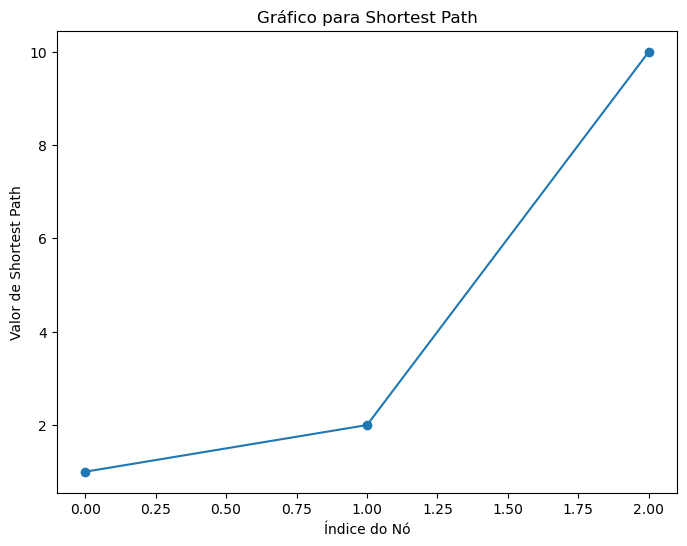

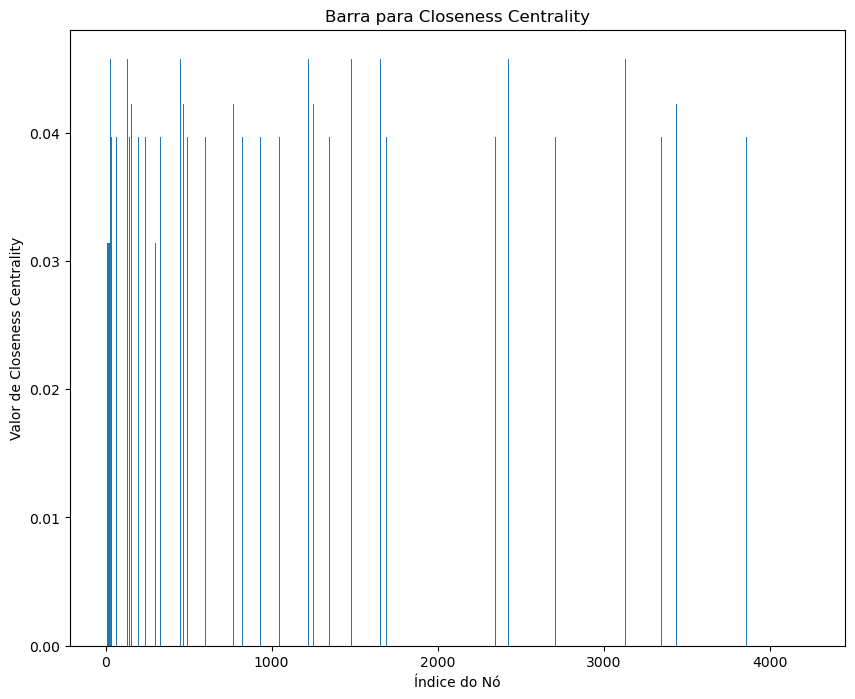

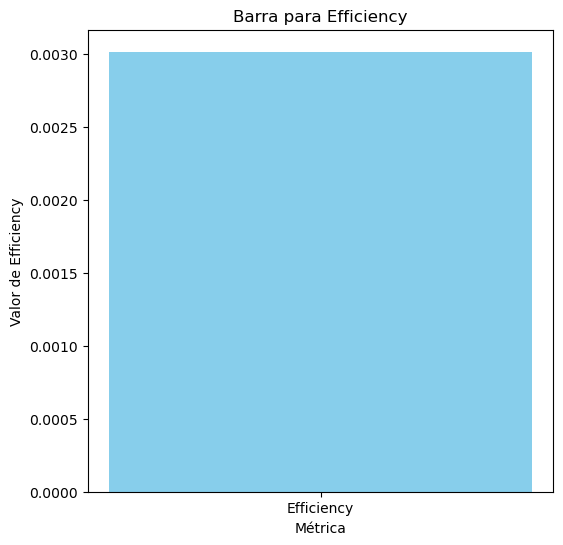

/tmp/ipykernel_107462/3989327350.py:13: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with self._driver.session() as session:


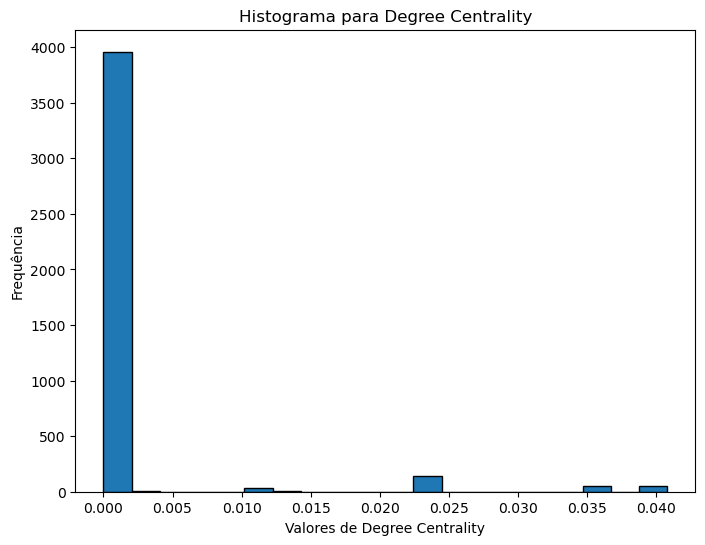

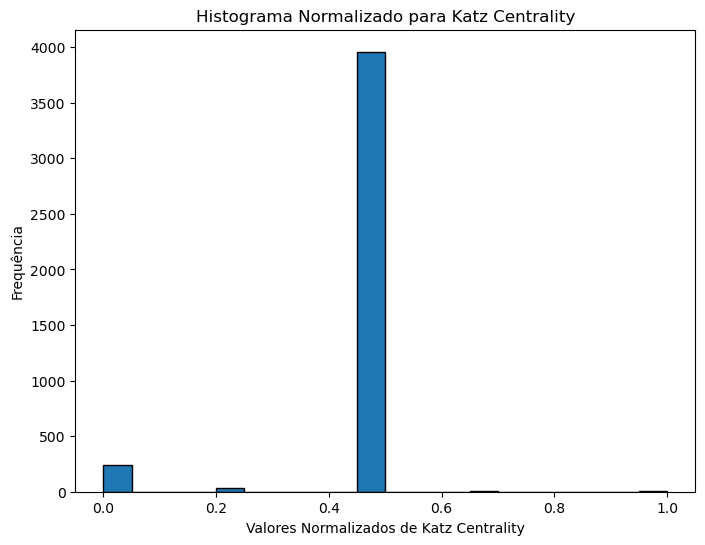

In [4]:
import sys
from pathlib import Path

# Procura o diretório raiz do projeto com o sys.path
sys.path.append(str(Path.cwd().parent))

from src.visualization.visualize import DataVisualization

data_visualization = DataVisualization()

# Visualizações
visualizacao = DataVisualization()

# Plotando histograma para o shortest_path
visualizacao.plot_shortest_path(centralidade.calcular_shortest_path(1, 10), "Shortest Path")

# Plotando histograma para a closeness centrality
visualizacao.plot_closeness_centrality(centralidade.calcular_closeness_centrality(), "Closeness Centrality")

# Plotando histograma para a efficiency
visualizacao.plot_centralidade_efficiency(centralidade.calcular_efficiency(), "Efficiency")

# Plotando histograma para a degree centrality
visualizacao.plot_centralidade_histogram(centralidade.calcular_degree_centrality(), "Degree Centrality")

# Plotando histograma normalizado para a katz centrality
visualizacao.plot_scaled_centralidade_histogram(centralidade.calcular_katz_centrality(), "Katz Centrality")